# Import Data into DataFrame

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get data directory
data_dir = os.path.join("data", "cs-train")

# Get data frame
df = pd.DataFrame()

# Get data files
data_files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
# Sort data files
data_files = sorted(data_files)

# Iterate over data files
for data_file in data_files:
    # Get invoice file
    invoice_file = os.path.join(data_dir, data_file)
    # Get invoice data frame
    invoice_df = pd.read_json(invoice_file)
    
    # Rename certain column names for consistency
    invoice_df = invoice_df.rename(columns={
        'StreamID': 'stream_id',
        'TimesViewed': 'times_viewed',
        'total_price': 'price'
    })
    
    # Add current invoice file to data frame
    df = df.append(invoice_df)

# Create invoice date from year, month, day columns
df['invoice_date'] = pd.to_datetime(df[['year', 'month', 'day']])
# Drop the year, month, day columns
df = df.drop(columns=['year', 'month', 'day'])

# Display data frame
df

,country,customer_id,invoice,price,stream_id,times_viewed,invoice_date
0,United Kingdom,13085.0,489434,6.95,85048,12,2017-11-28
1,United Kingdom,NaN,489597,8.65,22130,1,2017-11-28
2,United Kingdom,NaN,489597,1.70,22132,6,2017-11-28
3,United Kingdom,NaN,489597,1.70,22133,4,2017-11-28
4,United Kingdom,NaN,489597,0.87,22134,1,2017-11-28
...,...,...,...,...,...,...,...
42013,United Kingdom,15628.0,562163,0.85,21544,12,2019-07-31
42014,United Kingdom,15628.0,562163,1.95,47591D,8,2019-07-31
42015,United Kingdom,15628.0,562163,0.83,23167,12,2019-07-31
42016,United Kingdom,15628.0,562163,4.95,22138,3,2019-07-31


# Generate Distribution Plots

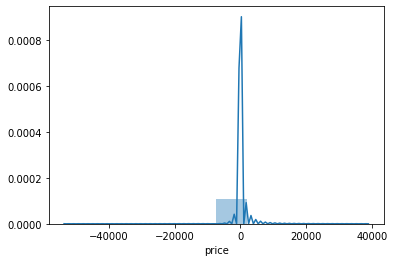

In [16]:
# Run distplot for price
sns.distplot(df['price'], bins=10)

In [17]:
# Remove outliers
df = df[df['price'].between(df['price'].quantile(0.02), df['price'].quantile(0.98))]

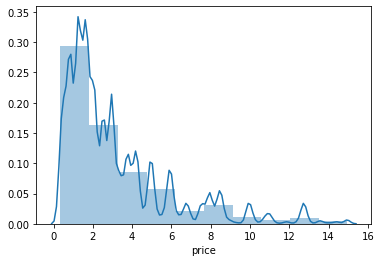

In [38]:
# Re-run distplot after removing outliers
sns.distplot(df['price'], bins=10)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


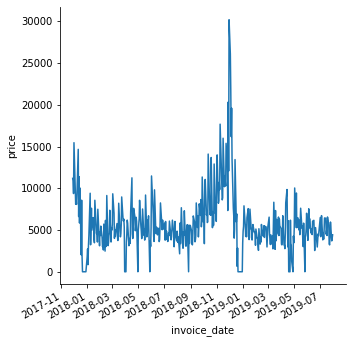

In [22]:
# Run relplot for invoice data vs price
g = sns.relplot(x='invoice_date', y='price', data=df.groupby(pd.Grouper(key='invoice_date', freq='B')).sum().reset_index(), kind='line')
g.fig.autofmt_xdate()

In [25]:
# Get revenue by country
revenue_by_country = df[['country', 'price']].groupby('country').sum().sort_values('price', ascending=False)
revenue_by_country = revenue_by_country.rename(columns={'price': 'revenue'})
revenue_by_country = revenue_by_country.reset_index()
revenue_by_country

,country,revenue
0,United Kingdom,2.293894e+06
1,EIRE,4.399854e+04
2,Germany,3.425095e+04
3,France,2.401081e+04
4,Netherlands,8.428490e+03
5,Spain,7.431480e+03
6,Switzerland,6.362150e+03
7,Belgium,5.612930e+03
8,Portugal,4.826680e+03
9,Channel Islands,4.624490e+03


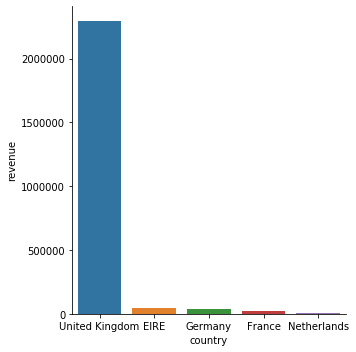

In [39]:
# Run catplot for country vs revenue
sns.catplot(x='country', y='revenue', data=revenue_by_country[:5], kind='bar')
plt.show()

# Summarize Findings

**Business Opportunity:**
* Find factors that are influencing the revenue numbers.

**Ideal Data:**
* Consistent, complete, valid, uniform data over time. Unbiased data.

**Findings:**
* United Kingdom has highest revenues
* Training data is not complete for 2017 and 2019
* Input dates are not in ideal/efficient format
* Input columns are not consistent in naming
